In [93]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize 
import scipy.interpolate as interpolate

In [94]:
def f(k, α):
    
    return k**α

def U(c):
    
    return np.log(c)

In [95]:
# Need to define the domain


k0 = 0.5

k_lowerbound = 1e-12
k_upperbound = max([1.0, k0])

N_points = 60
X = np.linspace(k_lowerbound, k_upperbound, N_points)

In [96]:
print(X)

[1.00000000e-12 1.69491525e-02 3.38983051e-02 5.08474576e-02
 6.77966102e-02 8.47457627e-02 1.01694915e-01 1.18644068e-01
 1.35593220e-01 1.52542373e-01 1.69491525e-01 1.86440678e-01
 2.03389831e-01 2.20338983e-01 2.37288136e-01 2.54237288e-01
 2.71186441e-01 2.88135593e-01 3.05084746e-01 3.22033898e-01
 3.38983051e-01 3.55932203e-01 3.72881356e-01 3.89830508e-01
 4.06779661e-01 4.23728814e-01 4.40677966e-01 4.57627119e-01
 4.74576271e-01 4.91525424e-01 5.08474576e-01 5.25423729e-01
 5.42372881e-01 5.59322034e-01 5.76271186e-01 5.93220339e-01
 6.10169492e-01 6.27118644e-01 6.44067797e-01 6.61016949e-01
 6.77966102e-01 6.94915254e-01 7.11864407e-01 7.28813559e-01
 7.45762712e-01 7.62711864e-01 7.79661017e-01 7.96610169e-01
 8.13559322e-01 8.30508475e-01 8.47457627e-01 8.64406780e-01
 8.81355932e-01 8.98305085e-01 9.15254237e-01 9.32203390e-01
 9.49152542e-01 9.66101695e-01 9.83050847e-01 1.00000000e+00]


In [97]:
# Creating the bellman equation:

def bellman(V_next, X, α, β):
    
    V_now = np.empty(X.shape)
    g_now = V_now.copy()
    
    for index_k, k in enumerate(X):
        
        objective_function = lambda k_next: -(U(f(k,α) - k_next)) + β*V_next(k_next)
        
        k_lowerbound, k_upperbound = X.min(), f(k, α)
        k_next_star = optimize.fminbound(objective_function, k_lowerbound, k_upperbound)
        
        V_now[index_k] = -objective_function(k_next_star)
        
        g_now[index_k] = k_next_star
    return g_now, V_now

    
    

In [98]:
def Fitter(X, V_data):
    ''' I dont know what this is '''
    f = interpolate.interp1d(X, V_data)
    return f

In [114]:
def backwardInduction(X, α, β, T=2):
    V_next_data = np.zeros(X.size)
    
    #interpolation
    V_next = Fitter(X, V_next_data)
    
    g_list = [] # stores policy and value functions?
    V_list = []
    
    #backward induction loop
    for t in range(T, -1, -1):
        print("Solving stage %i" %(t))
        g, V = bellman(V_next, X, α, β)# Evaluate bellman operator
        
        # Interpolate
        g_fitted = Fitter(X, g)
        V_fitted = Fitter(X, V)
        
        #Store in lists
        g_list.append(g_fitted)
        V_list.append(V_fitted)
        
        V_next = V_fitted
        
        #V_next = V_fitted
        #Update the continuation value
    
        
    return g_list, V_list
        

SyntaxError: 'return' outside function (<ipython-input-114-019401be1fd6>, line 29)

In [109]:
T = 20

α = 0.333
β = 0.98

In [110]:
g_list, V_list = backwardInduction(X, α, β, T=T)

# Re-roder lists
g_list = g_list[::-1]
V_list = V_list[::-1]

Solving stage 20
Solving stage 19
Solving stage 18
Solving stage 17
Solving stage 16
Solving stage 15
Solving stage 14
Solving stage 13
Solving stage 12
Solving stage 11
Solving stage 10
Solving stage 9
Solving stage 8
Solving stage 7
Solving stage 6
Solving stage 5
Solving stage 4
Solving stage 3
Solving stage 2
Solving stage 1
Solving stage 0


# Visualise Results

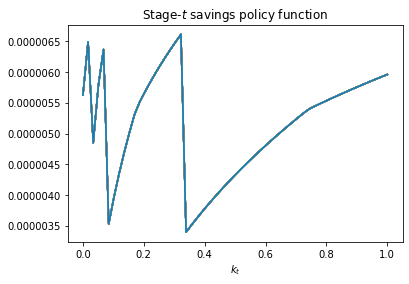

In [111]:
plt.figure()
for t in range(len(g_list)):
    plt.plot(X, g_list[t](X))
    plt.xlabel("$k_{t}$")
    plt.title("Stage-$t$ savings policy function")

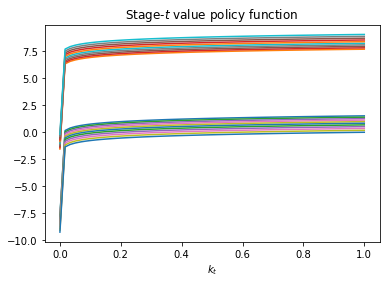

In [112]:
plt.figure()
for t in range(len(V_list)):
    plt.plot(X, V_list[t](X))
    plt.xlabel("$k_{t}$")
    plt.title("Stage-$t$ value policy function")

In [113]:
g_list[10](0.55123)

array(4.57616855e-06)